In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
loans = pd.read_csv('loan_borowwer_data.csv')

In [3]:
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


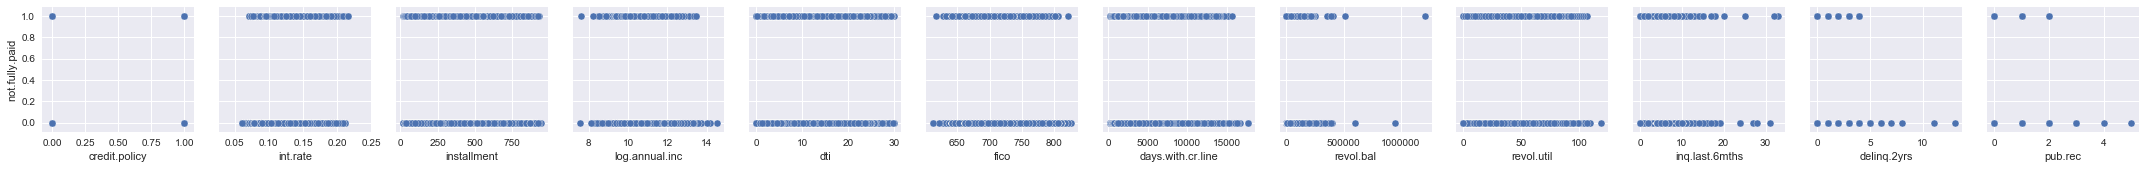

In [7]:
sns.pairplot(loans,x_vars=['credit.policy','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec'],y_vars=['not.fully.paid'])

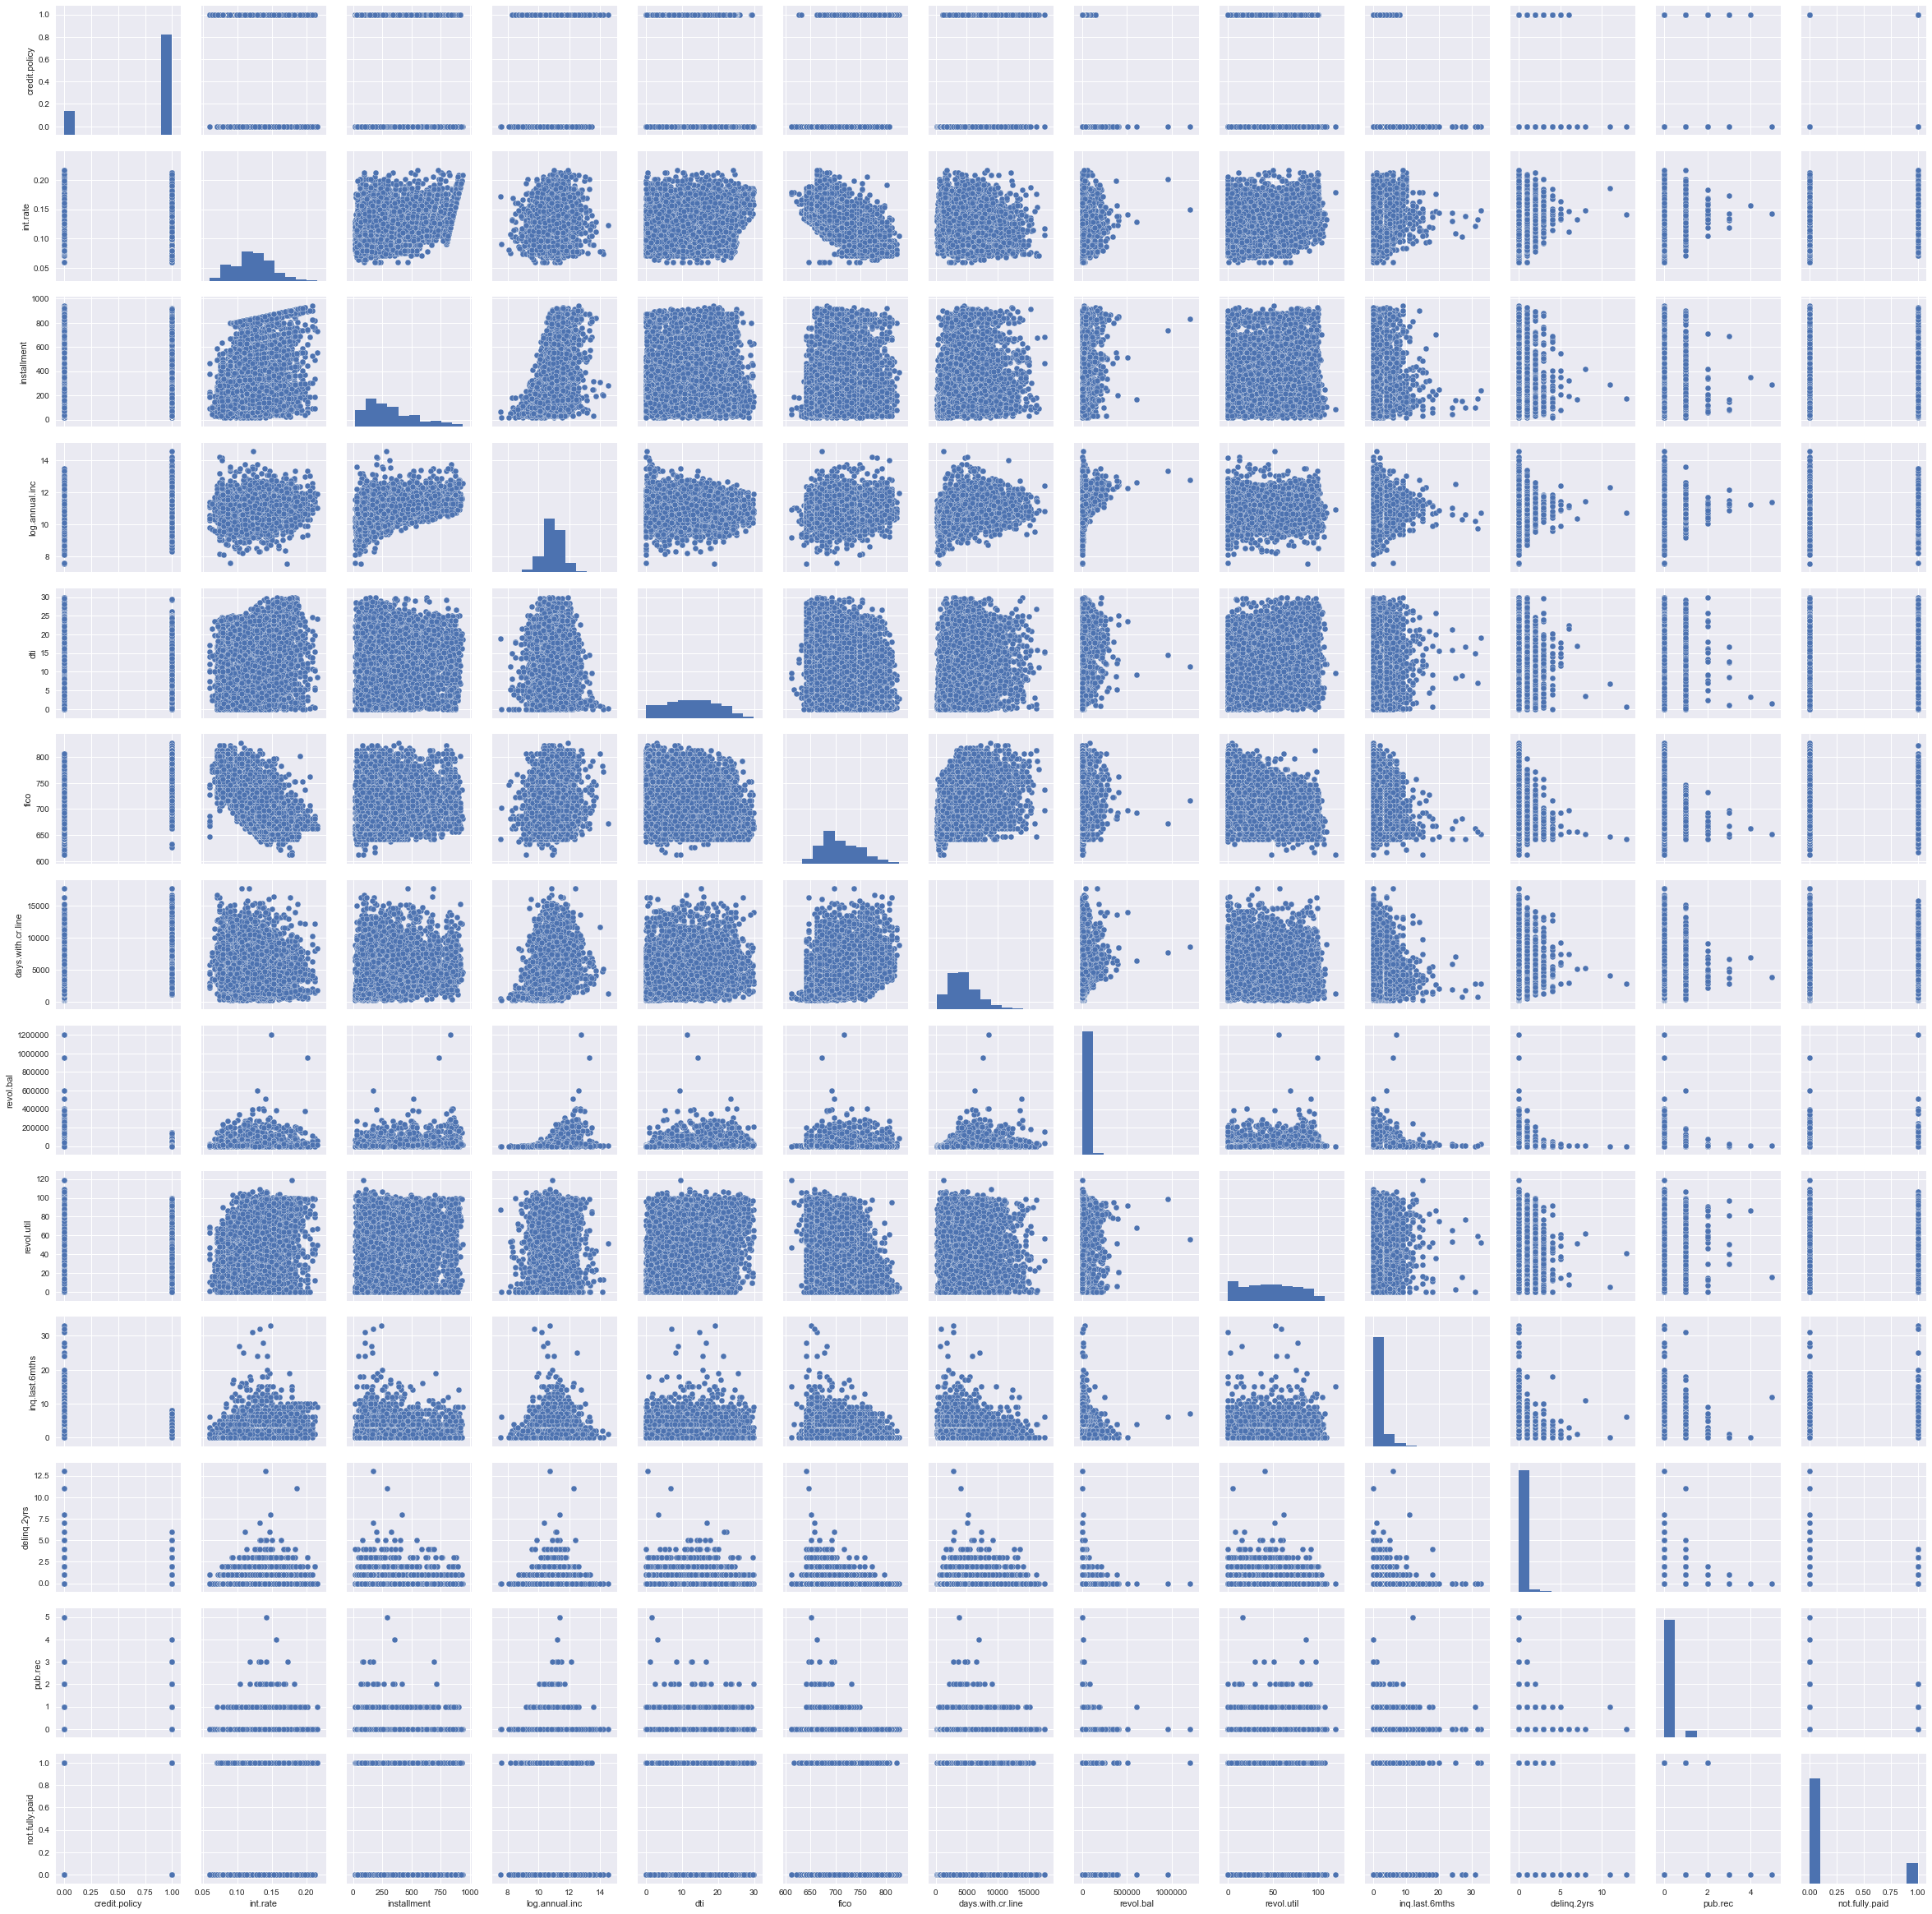

In [8]:
sns.pairplot(loans)

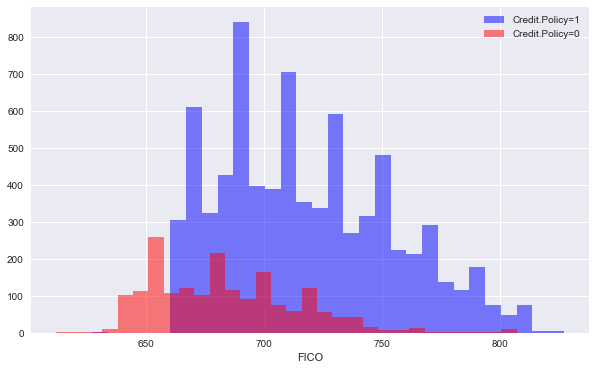

In [9]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

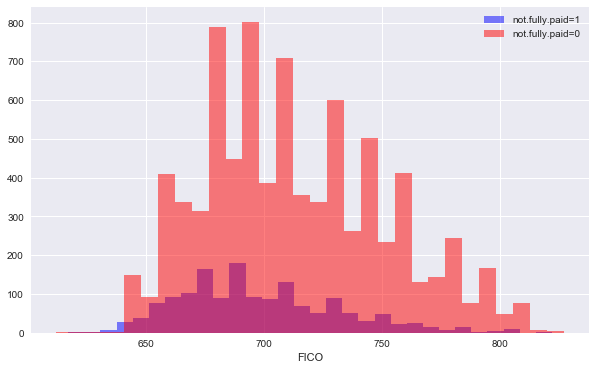

In [10]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue', bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

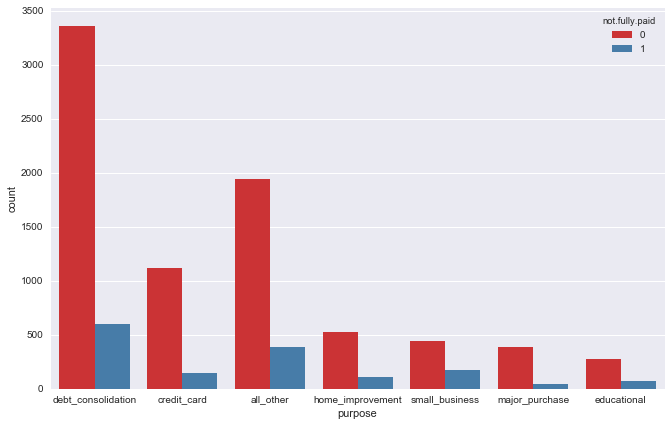

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
cat_feats = ['purpose']

In [14]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [16]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6704, 18) (2874, 18) (6704,) (2874,)


In [18]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


In [19]:

y_test.head()

8261    0
3431    1
5482    1
3272    1
4687    0
Name: not.fully.paid, dtype: int64

# DecisionTree_Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
predictions1 = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions1))

             precision    recall  f1-score   support

          0       0.84      0.83      0.84      2397
          1       0.20      0.22      0.21       477

avg / total       0.74      0.73      0.73      2874



[[1991  406]
 [ 373  104]]


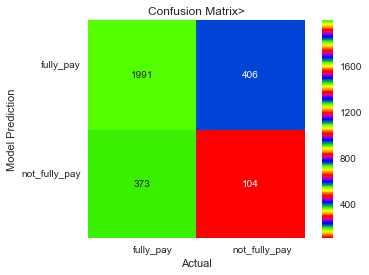

In [26]:
Dt = confusion_matrix(y_test,predictions1)
print(Dt)

axes = sns.heatmap(Dt,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.prism)

class_labels = ['fully_pay','not_fully_pay']

axes.set_xlabel('Actual')
axes.set_ylabel('Model Prediction')

tick_marks = np.arange(len(class_labels)) + 0.6

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)

class_labels1 = ['not_fully_pay','fully_pay']
tick_marks = np.arange(len(class_labels1)) + 0.6

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels1,rotation=0)

axes.set_title('Confusion Matrix>')

In [27]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,predictions1))

Accuracy: 0.728949199722


# RandomForest_Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=600)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
predictions2 = rfc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictions2))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      2397
          1       0.44      0.01      0.03       477

avg / total       0.77      0.83      0.76      2874



[[2388    9]
 [ 470    7]]


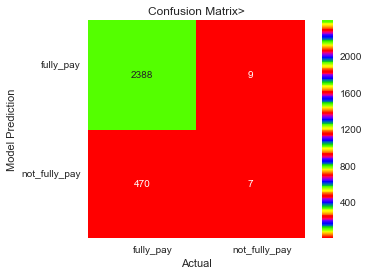

In [34]:
Rfc = confusion_matrix(y_test,predictions2)

print(Rfc)

axes = sns.heatmap(Rfc,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.prism)

class_labels = ['fully_pay','not_fully_pay']

axes.set_xlabel('Actual')
axes.set_ylabel('Model Prediction')

tick_marks = np.arange(len(class_labels)) + 0.6

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)

class_labels1 = ['not_fully_pay','fully_pay']
tick_marks = np.arange(len(class_labels1)) + 0.6

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels1,rotation=0)

axes.set_title('Confusion Matrix>')

In [35]:
from sklearn import metrics

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test,predictions2))

Accuracy: 0.833333333333


# SVM

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
predictions3 = model.predict(X_test)

In [39]:
import warnings
warnings.filterwarnings('ignore') 

In [40]:
from sklearn.metrics import classification_report,confusion_matrix


In [41]:
print(classification_report(y_test,predictions3))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91      2397
          1       0.00      0.00      0.00       477

avg / total       0.70      0.83      0.76      2874



[[2397    0]
 [ 477    0]]


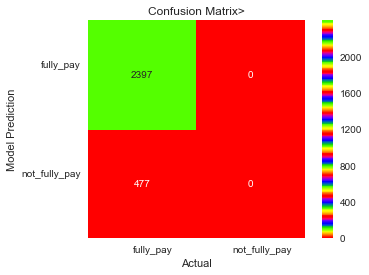

In [42]:
Svm = confusion_matrix(y_test,predictions3)

print(Svm)

axes = sns.heatmap(Svm,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.prism)

class_labels = ['fully_pay','not_fully_pay']

axes.set_xlabel('Actual')
axes.set_ylabel('Model Prediction')

tick_marks = np.arange(len(class_labels)) + 0.6

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)

class_labels1 = ['not_fully_pay','fully_pay']
tick_marks = np.arange(len(class_labels1)) + 0.6

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels1,rotation=0)

axes.set_title('Confusion Matrix>')

In [43]:
from sklearn import metrics

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test,predictions3))

Accuracy: 0.834029227557


# Logistic Regression 

In [45]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1',random_state = 1)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
predictions4 = classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(y_test,predictions4))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91      2397
          1       0.50      0.02      0.04       477

avg / total       0.78      0.83      0.76      2874



[[2387   10]
 [ 467   10]]


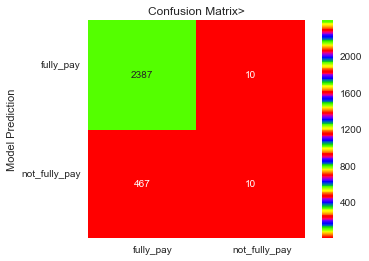

In [49]:
Lr = confusion_matrix(y_test,predictions4)
print(Lr)
axes = sns.heatmap(Lr,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.prism)

class_labels = ['fully_pay','not_fully_pay']

axes.set_ylabel('Model Prediction')

tick_marks = np.arange(len(class_labels)) + 0.6

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)

class_labels1 = ['not_fully_pay','fully_pay']
tick_marks = np.arange(len(class_labels1)) + 0.6

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels1,rotation=0)

axes.set_title('Confusion Matrix>')


In [50]:
from sklearn import metrics

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test,predictions4))

Accuracy: 0.834029227557


# K-NN

non-linear classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
#Here we use euclidian distance rule to find the nearest neighbour

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
# Predicting the Test set results
predictions5 = classifier.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,predictions5))

             precision    recall  f1-score   support

          0       0.83      0.97      0.90      2397
          1       0.18      0.03      0.06       477

avg / total       0.73      0.81      0.76      2874



[[2322   75]
 [ 461   16]]


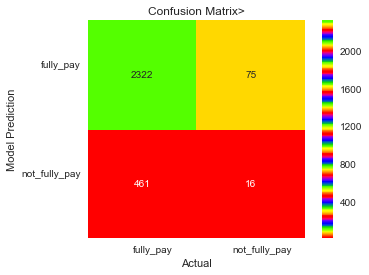

In [56]:
Knn = confusion_matrix(y_test,predictions5)

print(Knn)

axes = sns.heatmap(Knn,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.prism)

class_labels = ['fully_pay','not_fully_pay']

axes.set_xlabel('Actual')
axes.set_ylabel('Model Prediction')

tick_marks = np.arange(len(class_labels)) + 0.6

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)

class_labels1 = ['not_fully_pay','fully_pay']
tick_marks = np.arange(len(class_labels1)) + 0.6

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels1,rotation=0)

axes.set_title('Confusion Matrix>')

In [57]:
from sklearn import metrics

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test,predictions5))

Accuracy: 0.813500347947


# Naive Bayes

In [59]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None)

In [60]:
predictions6 = classifier.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,predictions6))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90      2397
          1       0.37      0.09      0.15       477

avg / total       0.76      0.82      0.78      2874



[[2321   76]
 [ 433   44]]


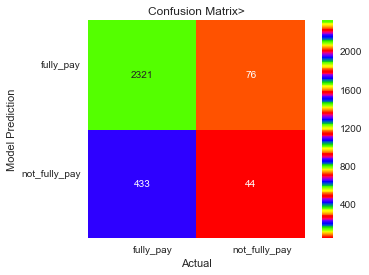

In [63]:
nb = confusion_matrix(y_test,predictions6)
print(nb)
axes = sns.heatmap(nb,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.prism)

class_labels = ['fully_pay','not_fully_pay']

axes.set_xlabel('Actual')
axes.set_ylabel('Model Prediction')

tick_marks = np.arange(len(class_labels)) + 0.6

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)

class_labels1 = ['not_fully_pay','fully_pay']
tick_marks = np.arange(len(class_labels1)) + 0.6

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels1,rotation=0)

axes.set_title('Confusion Matrix>')

In [64]:
from sklearn import metrics

In [65]:
print(len(y_test))

2874


In [66]:
print("Accuracy:",metrics.accuracy_score(y_test,predictions6))

Accuracy: 0.822894919972


<b>Visualize the CAP Curve Analysis including all 6 classification models</b><br>
<i>--> area under curve</i>

477
Accuracy Rate for D Tree: 0.7351021411285421
Accuracy Rate for Random Forest: 0.9926008139104698
Accuracy Rate for Support Vector Classifier: 1.0
Accuracy Rate for Logistic regression: 0.9918311586198332
Accuracy Rate for K-NN: 0.9395208371050816
Accuracy Rate for Naive Bayes: 0.9424367811266529


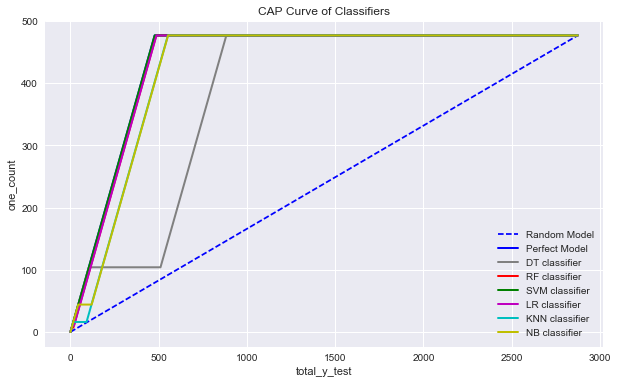

In [69]:
from sklearn.metrics import roc_curve, auc

total = len(y_test) 
one_count = np.sum(y_test) 
print(one_count)
zero_count = total - one_count 
cap_dt = [y for _, y in sorted(zip(predictions1, y_test), reverse = True)]
cap_rf = [y for _, y in sorted(zip(predictions2, y_test), reverse = True)] 
cap_svm = [y for _, y in sorted(zip(predictions3, y_test), reverse = True)] 
cap_lr = [y for _, y in sorted(zip(predictions4, y_test), reverse = True)] 
cap_knn = [y for _, y in sorted(zip(predictions5, y_test), reverse = True)] 
cap_nb = [y for _, y in sorted(zip(predictions6, y_test), reverse = True)] 
x = np.arange(0, total + 1) 
y_dt = np.append([0], np.cumsum(cap_dt)) 
y_rf = np.append([0], np.cumsum(cap_rf)) 
y_svm = np.append([0], np.cumsum(cap_svm)) 
y_lr = np.append([0], np.cumsum(cap_lr)) 
y_knn= np.append([0], np.cumsum(cap_knn))
y_nb = np.append([0], np.cumsum(cap_nb))
plt.figure(figsize = (10, 6)) 
plt.plot([0, total], [0, one_count], c = 'b', linestyle = '--', label = 'Random Model')
plt.plot([0, one_count, total], [0, one_count, one_count], c = 'b', linewidth = 2, label = 'Perfect Model')
plt.title('CAP Curve of Classifiers')
plt.plot(x, y_dt, c = 'grey', label = 'DT classifier', linewidth = 2)
plt.plot(x, y_rf, c = 'r', label = 'RF classifier', linewidth = 2)
plt.plot(x, y_svm, c = 'g', label = 'SVM classifier', linewidth = 2)
plt.plot(x, y_lr, c = 'm', label = 'LR classifier', linewidth = 2)
plt.plot(x, y_knn, c = 'c', label = 'KNN classifier', linewidth = 2)
plt.plot(x, y_nb, c = 'y', label = 'NB classifier', linewidth = 2)
plt.legend()

# Area under Random Model
a = auc([0, total], [0,one_count])

# Area between Perfect and Random Model
aP = auc([0, one_count, total], [0, one_count, one_count]) - a

# Area between svm and Random Model
aR1 = auc(x, y_dt) - a

# Area between svm and Random Model
aR2 = auc(x, y_rf) - a

# Area between svm and Random Model
aR3 = auc(x, y_svm) - a

# Area between svm and Random Model
aR4 = auc(x, y_lr) - a

# Area between svm and Random Model
aR5 = auc(x, y_knn) - a

# Area between svm and Random Model
aR6 = auc(x, y_nb) - a

print("Accuracy Rate for D Tree: {}".format(aR1 / aP))
print("Accuracy Rate for Random Forest: {}".format(aR2 / aP))
print("Accuracy Rate for Support Vector Classifier: {}".format(aR3 / aP))
print("Accuracy Rate for Logistic regression: {}".format(aR4 / aP))
print("Accuracy Rate for K-NN: {}".format(aR5 / aP))
print("Accuracy Rate for Naive Bayes: {}".format(aR6 / aP))

plt.xlabel('total_y_test')
plt.ylabel('one_count')

<b>THANK YOU</b>